In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor

import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

from sklearn.svm import SVR

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import BaggingRegressor

import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import GradientBoostingRegressor

from xgboost import XGBRegressor

from lightgbm import LGBMRegressor

from catboost import CatBoostRegressor

In [2]:
df = pd.read_excel('cleanedDatas.xlsx')

In [3]:
df.head()

,Unnamed: 0,neighborhood,grossArea,netArea,numberOfRooms,ageOfBuilding,floorLocation,totalNumberOfFloors,typeOfHeating,numberOfBathrooms,isThereBalcony,onSite,dues,titleDeed,new_price
0,0,Terazidere Mah.,130,130,2+2,0,3,3,Yerden Isıtma,2,Var,Hayır,0,Kat Mülkiyetli,1325000
1,1,Yıldırım Mh.,130,100,3+1,0,1,4,Doğalgaz (Kombi),2,Var,Hayır,0,Kat İrtifaklı,2550000
2,2,Muratpaşa Mh.,180,170,3+2,0,Çatı Katı,4,Doğalgaz (Kombi),2,Var,Hayır,0,Kat Mülkiyetli,1780000
3,3,Orta Mh.,90,85,2+1,0,Giriş Katı,3,Doğalgaz (Kombi),2,Yok,Hayır,0,Kat İrtifaklı,810000
4,4,Altıntepsi Mh.,95,90,2+1,5-10 arası,Giriş Katı,3,Doğalgaz (Kombi),1,Var,Hayır,0,Kat Mülkiyetli,420000


In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]


    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    return cat_cols, num_cols, cat_but_car
cat_cols, num_cols, cat_but_car = grab_col_names(df)

In [6]:
binary_columns = [sütun for sütun in df.columns 
               if df[sütun].dtype not in [int, float] and df[sütun].nunique() == 2]
binary_columns

['isThereBalcony', 'onSite', 'titleDeed']

In [7]:
ohe_columns = [sütun for sütun in df.columns if 30 >= df[sütun].nunique() 
               and sütun not in ['isThereBalcony','onSite','titleDeed']]
ohe_columns

['neighborhood',
 'numberOfRooms',
 'ageOfBuilding',
 'floorLocation',
 'totalNumberOfFloors',
 'typeOfHeating',
 'numberOfBathrooms',
 'dues']

In [8]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [9]:
df = one_hot_encoder(df, ohe_columns)

In [10]:
df = one_hot_encoder(df, binary_columns)

In [11]:
df

,grossArea,netArea,new_price,neighborhood_Altıntepsi Mh.,neighborhood_Cevatpaşa Mh.,neighborhood_Kartaltepe Mah.,neighborhood_Kocatepe Mah.,neighborhood_Muratpaşa Mh.,neighborhood_Orta Mh.,neighborhood_Terazidere Mah.,neighborhood_Vatan Mah.,neighborhood_Yenidoğan Mh.,neighborhood_Yıldırım Mh.,neighborhood_İsmet Paşa Mh.,numberOfRooms_1+1,numberOfRooms_2+1,numberOfRooms_2+2,numberOfRooms_3+1,numberOfRooms_3+2,numberOfRooms_4+1,numberOfRooms_4+2,numberOfRooms_5+2,ageOfBuilding_0,ageOfBuilding_1,ageOfBuilding_11-15 arası,ageOfBuilding_16-20 arası,ageOfBuilding_2,ageOfBuilding_21-25 arası,ageOfBuilding_26-30 arası,ageOfBuilding_3,ageOfBuilding_31 ve üzeri,ageOfBuilding_4,ageOfBuilding_5-10 arası,floorLocation_1,floorLocation_10-15 Arası,floorLocation_15-25 Arası,floorLocation_2,floorLocation_3,floorLocation_4,floorLocation_5,floorLocation_5-10 Arası,floorLocation_Bodrum Kat,floorLocation_Giriş Katı,floorLocation_Çatı Katı,totalNumberOfFloors_1,totalNumberOfFloors_10-15 Arası,totalNumberOfFloors_15-25 Arası,totalNumberOfFloors_3,totalNumberOfFloors_4,totalNumberOfFloors_5,totalNumberOfFloors_5-10 Arası,typeOfHeating_Doğalgaz (Kombi),typeOfHeating_Doğalgaz Sobası,typeOfHeating_Kat Kaloriferi,typeOfHeating_Merkezi,typeOfHeating_Soba,typeOfHeating_Yerden Isıtma,numberOfBathrooms_1,numberOfBathrooms_2,numberOfBathrooms_3,numberOfBathrooms_4,numberOfBathrooms_5,dues_0,dues_1-50 TL Arası,dues_125-250 TL Arası,dues_250-550 TL Arası,dues_50-125 TL Arası,dues_550-1000 TL Arası,isThereBalcony_Var,isThereBalcony_Yok,onSite_Evet,onSite_Hayır,titleDeed_Kat Mülkiyetli,titleDeed_Kat İrtifaklı
0,130,130,1325000,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0
1,130,100,2550000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1
2,180,170,1780000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0
3,90,85,810000,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1
4,95,90,420000,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,120,110,1450000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0
612,65,50,445000,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0
613,120,110,950000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1
614,105,100,800000,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0


In [12]:
X = df.drop("new_price", axis = 1)
y = df["new_price"]

# KNN Regression

In [ ]:
def knr_model(X,y, show=False):
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.15,random_state=42)
    
    knr_model = KNeighborsRegressor()    
    
    knr_model_params = {
        "n_neighbors": np.arange(2,15,1),
        "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
        "leaf_size": [10,20,30]
    }
                 
    knr_cv_model = GridSearchCV(knr_model, knr_model_params, cv=10, verbose=1).fit(X_train, y_train)
    
    knr_final_model = knr_model.set_params(**knr_cv_model.best_params_).fit(X_train, y_train)
    
    y_predicted = knr_final_model.predict(X_test)
    print("RMSE : {0}".format(np.sqrt(mean_squared_error(y_test,y_predicted))))
    
    if(show):    
        plt.subplot(2,1,1)
        plt.plot(list(y_test), 'b')
        plt.subplot(2,1,2)
        plt.plot(list(y_predicted), 'r-')
        plt.show

knr_model(X,y,True)

# Support Vector Regression

In [ ]:
def svr_model(X,y,show=False):
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.15,random_state=42)
    
    svr_model = SVR(kernel = "linear")
    svr_model_params = {
        'C' : np.arange(0.1,2,0.1),
        'cache_size': [100,150,200,300,500,1000],
        'epsilon': np.arange(0.1,2,0.2)
    }
    
    svr_cv_model = GridSearchCV(svr_model, svr_model_params, cv = 10, verbose=1).fit(X_train,y_train)
    
    svr_final_model = SVR(**svr_cv_model.best_params_).fit(X_train, y_train)
    
    y_predicted = svr_final_model.predict(X_test)
    print("MSE : {0}".format(mean_squared_error(y_test,y_predicted)))
    
    if(show):    
        plt.subplot(2,1,1)
        plt.plot(list(y_test), 'b')
        plt.subplot(2,1,2)
        plt.plot(list(y_predicted), 'r-')
        plt.show
        
svr_model(X,y,True)

# Classification and Regression Trees (CART)

In [ ]:
def rt_model(X, y, show = False):
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.15,random_state=42)
    
    rt_model = DecisionTreeRegressor()
    rt_model_params = {
        #"min_samples_split": np.arange(2,100),
        "max_leaf_nodes": np.arange(2,10)
    }
    
    rt_cv_model = GridSearchCV(rt_model, rt_model_params, cv=10, verbose=1).fit(X_train, y_train)

    rt_final_model = rt_model.set_params(**rt_cv_model.best_params_).fit(X_train, y_train)
    
    y_predicted = rt_final_model.predict(X_test)
    print("MSE : {0}".format(mean_squared_error(y_test,y_predicted)))
    
    
    if(show):    
        plt.subplot(2,1,1)
        plt.plot(list(y_test), 'b')
        plt.subplot(2,1,2)
        plt.plot(list(y_predicted), 'r-')
        plt.show

rt_model(X,y,True)

# Bagging Trees Regresyon

Fitting 10 folds for each of 36 candidates, totalling 360 fits
MSE : 177227673374.8867


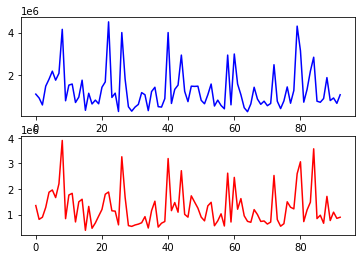

In [13]:
def btr_model(X,y,show=False):
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.15,random_state=42)
    
    btr_model = BaggingRegressor()
    
    btr_model_params = {
        "n_estimators": range(2,20),
        "bootstrap_features" : ["True", "False"]
    }
    btr_cv_model = GridSearchCV(btr_model, btr_model_params, cv = 10, verbose=1).fit(X_train, y_train)
    
    btr_final_model = btr_model.set_params(**btr_cv_model.best_params_).fit(X_train, y_train)
    
    y_predicted = btr_final_model.predict(X_test)
    print("MSE : {0}".format(mean_squared_error(y_test,y_predicted)))
    
    if(show):    
        plt.subplot(2,1,1)
        plt.plot(list(y_test), 'b')
        plt.subplot(2,1,2)
        plt.plot(list(y_predicted), 'r-')
        plt.show

btr_model(X,y,True)

# Random Forest Regression Model

Fitting 10 folds for each of 4 candidates, totalling 40 fits
MSE : 163694570329.23386


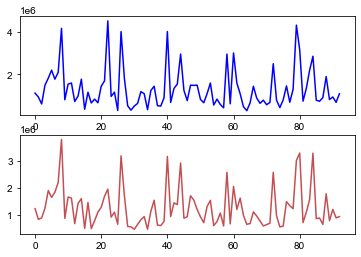

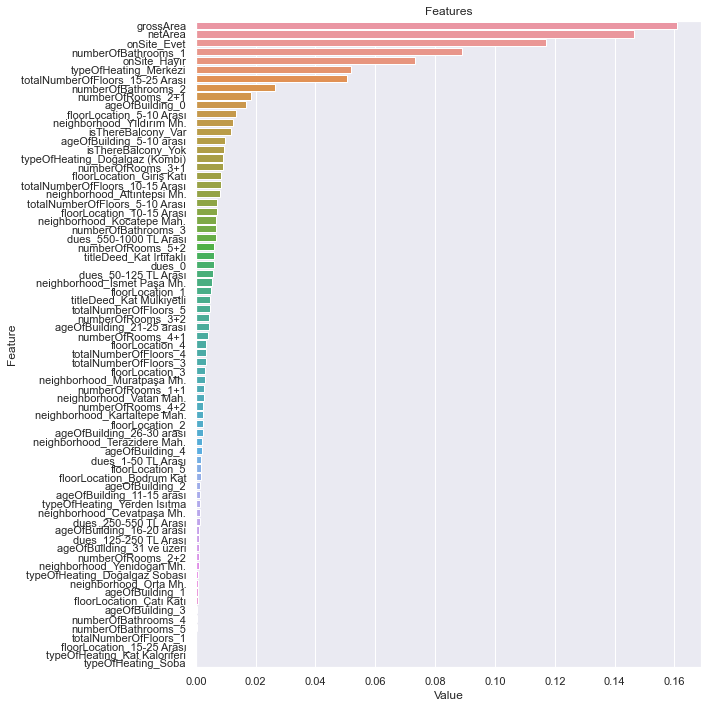

In [14]:
def rfr_model(X,y,show=False):
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.15,random_state=42)

    rfr_model = RandomForestRegressor(random_state = 42)
    
    rfr_model_params = {
        #'max_depth': list(range(1,10)),
        'max_features': [3,5,10,15],
        #'n_estimators' : [100, 200, 500, 750, 1000,1500, 2000]
    }
    rfr_cv_model = GridSearchCV(rfr_model, rfr_model_params, cv=10, verbose=1).fit(X_train, y_train)
    
    rfr_final_model = rfr_model.set_params(**rfr_cv_model.best_params_).fit(X_train, y_train)
    
    y_predicted = rfr_final_model.predict(X_test)
    print("MSE : {0}".format(mean_squared_error(y_test,y_predicted)))
     
    if(show):    
        plt.subplot(2,1,1)
        plt.plot(list(y_test), 'b')
        plt.subplot(2,1,2)
        plt.plot(list(y_predicted), 'r-')
        plt.show
        
        feature_importance = pd.DataFrame({'Value': rfr_final_model.feature_importances_, 'Feature': X_train.columns})
        plt.figure(figsize=(10, 10))
        sns.set(font_scale=1)
        sns.barplot(x="Value", y="Feature", data=feature_importance.sort_values(by="Value",
                                                                         ascending=False)[0:len(X_train)])
        plt.title('Features')
        plt.tight_layout()
        plt.show()
        
        
rfr_model(X,y,True)    

# Gradient Boosting Regression

In [ ]:
def gbr_model(X,y,show=True):
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.15,random_state=42)
    
    gbr_model = GradientBoostingRegressor()
    
    gbr_model_params = {
        'learning_rate' : np.arange(0.1,0.2,0.01), 
        'n_estimators' : [100, 110, 120, 125, 130],
        'max_features' : ["auto", "sqrt", "log2"],
        'max_leaf_nodes': [3,4,5,6,7,8]
    }
    
    gbr_cv_model = GridSearchCV(gbr_model, gbr_model_params, cv=10, verbose=1).fit(X_train, y_train)
    print(gbr_cv_model.best_params_)
    gbr_final_model = gbr_model.set_params(**gbr_cv_model.best_params_).fit(X_train, y_train)
    
    y_predicted = gbr_final_model.predict(X_test)
    print("MSE : {0}".format(mean_squared_error(y_test,y_predicted)))
    
    if(show):    
        plt.subplot(2,1,1)
        plt.plot(list(y_test), 'b')
        plt.subplot(2,1,2)
        plt.plot(list(y_predicted), 'r-')
        plt.show
            
        feature_importance = pd.DataFrame({'Value': gbr_final_model.feature_importances_, 'Feature': X_train.columns})
        plt.figure(figsize=(10, 10))
        sns.set(font_scale=1)
        sns.barplot(x="Value", y="Feature", data=feature_importance.sort_values(by="Value",ascending=False)[0:len(X_train)])
        plt.title('Features')
        plt.tight_layout()
        plt.show()
    
gbr_model(X,y,show=True)

# XGBoost

In [ ]:
def xgbr_model(X,y,show=False):
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.15,random_state=42)
    
    xgbr_model = XGBRegressor()
    
    xgbr_model_params = {
        'colsample_bytree':[0.4, 0.5,0.6,0.9,1], 
        #'n_estimators':[100, 200, 500, 1000],
        #'max_depth': [2,3,4,5,6],
        #'learning_rate': [0.1, 0.01, 0.5]
    }

    xgbr_cv_model = GridSearchCV(xgbr_model, xgbr_model_params, cv=10, verbose=1).fit(X_train, y_train)

    xgbr_final_model = xgbr_model.set_params(**xgbr_cv_model.best_params_).fit(X_train, y_train)
    
    y_predicted = xgbr_final_model.predict(X_test)
    print("MSE : {0}".format(mean_squared_error(y_test,y_predicted)))

    if(show):    
        plt.subplot(2,1,1)
        plt.plot(list(y_test), 'b')
        plt.subplot(2,1,2)
        plt.plot(list(y_predicted), 'r-')
        plt.show

        feature_importance = pd.DataFrame({'Value': xgbr_final_model.feature_importances_, 'Feature': X_train.columns})
        plt.figure(figsize=(10, 10))
        sns.set(font_scale=1)
        sns.barplot(x="Value", y="Feature", data=feature_importance.sort_values(by="Value",ascending=False)[0:len(X_train)])
        plt.title('Features')
        plt.tight_layout()
        plt.show()
    
xgbr_model(X,y,show=True)

# Light GBM

In [ ]:
def lgbmr_model(X,y,show=False):
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.15,random_state=42)

    lgbmr_model = LGBMRegressor()
    
    lgbmr_model_params = {
        'colsample_bytree': [0.4, 0.5,0.6,0.9,1],
        #'learning_rate': [0.01, 0.1, 0.5,1],
        #'n_estimators': [20, 40, 100, 200, 500,1000],
        #'max_depth': [1,2,3,4,5,6,7,8]
    }
    
    lgbmr_cv_model = GridSearchCV(lgbmr_model, lgbmr_model_params, cv=10, verbose=1).fit(X_train, y_train)
    
    lgbmr_final_model = lgbmr_model.set_params(**lgbmr_cv_model.best_params_).fit(X_train, y_train)
    
    y_predicted = lgbmr_final_model.predict(X_test)
    print("MSE : {0}".format(mean_squared_error(y_test,y_predicted)))
     
    if(show):    
        plt.subplot(2,1,1)
        plt.plot(list(y_test), 'b')
        plt.subplot(2,1,2)
        plt.plot(list(y_predicted), 'r-')
        plt.show

        feature_importance = pd.DataFrame({'Value': lgbmr_final_model.feature_importances_, 'Feature': X_train.columns})
        plt.figure(figsize=(10, 10))
        sns.set(font_scale=1)
        sns.barplot(x="Value", y="Feature", data=feature_importance.sort_values(by="Value",ascending=False)[0:len(X_train)])
        plt.title('Features')
        plt.tight_layout()
        plt.show()        


lgbmr_model(X,y,True)    

# CatBoost

In [ ]:
def cbr_model(X,y,show=False):
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.15,random_state=42)

    cbr_model = CatBoostRegressor()
    
    cbr_model_params = {
        'iterations': [200,500,1000,2000],
        #'learning_rate': [0.01, 0.03, 0.05, 0.1],
        #'depth': [3,4,5,6,7,8]
    }

    cbr_cv_model = GridSearchCV(cbr_model, cbr_model_params, cv=10, verbose=1).fit(X_train, y_train)
    
    cbr_final_model = cbr_model.set_params(**cbr_cv_model.best_params_).fit(X_train, y_train)
    
    y_predicted = cbr_final_model.predict(X_test)
    print("MSE : {0}".format(mean_squared_error(y_test,y_predicted)))
     
    if(show):    
        plt.subplot(2,1,1)
        plt.plot(list(y_test), 'b')
        plt.subplot(2,1,2)
        plt.plot(list(y_predicted), 'r-')
        plt.show

        feature_importance = pd.DataFrame({'Value': cbr_final_model.feature_importances_, 'Feature': X_train.columns})
        plt.figure(figsize=(10, 10))
        sns.set(font_scale=1)
        sns.barplot(x="Value", y="Feature", data=feature_importance.sort_values(by="Value",ascending=False)[0:len(X_train)])
        plt.title('Features')
        plt.tight_layout()
        plt.show()        

        """
        import xgboost as xgb
        format = 'png' #'svg' formatını da deneyebilirsin.

        image = xgb.to_graphviz(xgbr_final_model)

        #DPI ne kadar kaliteli olacağını belirtiyor. Eğer 'png' seçtiysen DPI kullanabilirsin.
        image.graph_attr = {'dpi':'400'}

        image.render('xgboost_agac_gorsel', format = format)
        """
        
cbr_model(X,y,True)    